In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import seaborn as sns

## Cleaning

In [122]:
df = pd.read_csv("D:/University/third_course/MTAD/lab1/Spotify_Youtube.csv")
df.shape

(20718, 28)

In [123]:
df = df.drop(columns = ["Unnamed: 0", "Url_spotify", "Uri", "Url_youtube"])


In [124]:
print(df.shape)
df = df.dropna()
print(df.shape)

(20718, 24)
(19170, 24)


In [125]:
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [126]:
numeric_df = df.select_dtypes(include=['number'])
# numeric_df = numeric_df.drop(columns = ["Duration_ms", "Likes", "Comments", "Stream"])

In [127]:
df_cleaned = df.copy()

In [128]:
for column in numeric_df.columns:
    lower_bound = numeric_df[column].quantile(0.003)  
    upper_bound = numeric_df[column].quantile(0.99)  
    
    initial_count = df_cleaned.shape[0]
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound)]
    final_count = df_cleaned.shape[0]
    
    print(f"Column '{column}': removed {initial_count - final_count} rows.")
df_cleaned = df_cleaned.reset_index(drop=True)
print(f"Number of rows before removal: {df.shape[0]}")
print(f"Number of rows after removal: {df_cleaned.shape[0]}")


Column 'Danceability': removed 57 rows.
Column 'Energy': removed 47 rows.
Column 'Key': removed 0 rows.
Column 'Loudness': removed 23 rows.
Column 'Speechiness': removed 35 rows.
Column 'Acousticness': removed 57 rows.
Column 'Instrumentalness': removed 0 rows.
Column 'Liveness': removed 57 rows.
Column 'Valence': removed 31 rows.
Column 'Tempo': removed 35 rows.
Column 'Duration_ms': removed 34 rows.
Column 'Views': removed 48 rows.
Column 'Likes': removed 11 rows.
Column 'Comments': removed 0 rows.
Column 'Stream': removed 47 rows.
Number of rows before removal: 19170
Number of rows after removal: 18688


In [129]:
df_cleaned.to_csv('cleaned_data.csv')

In [130]:
numeric_cdf = df_cleaned.select_dtypes(include=['number'])
numeric_cdf.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,0.818,0.705,6.0,-6.679,0.1770,0.00836,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.08690,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.04250,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07
3,0.663,0.694,10.0,-8.627,0.1710,0.02530,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08
4,0.760,0.891,11.0,-5.852,0.0372,0.02290,0.086900,0.2980,0.966,120.264,245000.0,259021161.0,1844658.0,72008.0,3.238503e+08


In [131]:
# one = 'Likes'
# two = 'Views'
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=df_cleaned[one], y=df_cleaned[two], color='blue', edgecolor='black')

# plt.title(f'Залежність {two} від {one}', fontsize=14)
# plt.xlabel(one, fontsize=12)
# plt.ylabel(two, fontsize=12)
# plt.grid(True)
# plt.show()

In [132]:
# plt.figure(figsize=(12, 6))
# sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()

In [133]:
# plt.figure(figsize=(12, 6))
# sns.heatmap(numeric_cdf.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()

### Порахувати середнє, усічене середнє, медіану, дисперсією, стандартне відхилення, середнє відхидення, абсолютно медіане відхилення. 

In [134]:
# Функція для обчислення середнього
def mean(column):
    return sum(column) / len(column)

# Функція для обчислення усіченого середнього
def trimmed_mean(column, trim_percent):
    sorted_col = sorted(column)
    trim_count = int(len(sorted_col) * trim_percent)
    trimmed_col = sorted_col[trim_count:-trim_count]
    return sum(trimmed_col) / len(trimmed_col)

# Функція для обчислення медіани
def median(column):
    sorted_col = sorted(column)
    n = len(sorted_col)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_col[mid - 1] + sorted_col[mid]) / 2
    else:
        return sorted_col[mid]

# Функція для обчислення дисперсії
def variance(column):
    column_mean = mean(column)
    return sum((x - column_mean) ** 2 for x in column) / (len(column) - 1)

# Функція для обчислення стандартного відхилення
def std_dev(column):
    return variance(column) ** 0.5

# Функція для обчислення середнього відхилення
def mean_absolute_deviation(column):
    column_mean = mean(column)
    return sum(abs(x - column_mean) for x in column) / len(column)

# Функція для обчислення абсолютного медіанного відхилення
def median_absolute_deviation(column):
    col_median = median(column)
    deviations = [abs(x - col_median) for x in column]
    return median(deviations)

# Функція для обчислення всіх показників для обраних стовпців
def calculate_statistics(df, columns = None, trim_percent=0.1):
    if isinstance(columns, str):
        columns = [columns]
    elif columns is None:
        columns = df.columns

    results = {}
    for column in columns:
        col_data = df[column].dropna().tolist() 
        stats = {
            'mean': mean(col_data),
            'trimmed_mean': trimmed_mean(col_data, trim_percent),
            'median': median(col_data),
            'variance': variance(col_data),
            'std_dev': std_dev(col_data),
            'mean_absolute_deviation': mean_absolute_deviation(col_data),
            'median_absolute_deviation': median_absolute_deviation(col_data)
        }
        results[column] = stats
    results_df = pd.DataFrame(results).T
    return results_df


In [135]:
stats_one_column = calculate_statistics(numeric_cdf, 'Energy')
stats_one_column.head()

,mean,trimmed_mean,median,variance,std_dev,mean_absolute_deviation,median_absolute_deviation
Energy,0.640347,0.656656,0.669,0.042719,0.206686,0.165477,0.139


In [136]:
stats_multiple_columns = calculate_statistics(numeric_cdf, ['Energy', 'Loudness'])
stats_multiple_columns

,mean,trimmed_mean,median,variance,std_dev,mean_absolute_deviation,median_absolute_deviation
Energy,0.640347,0.656656,0.6690,0.042719,0.206686,0.165477,0.1390
Loudness,-7.390518,-6.781533,-6.4595,16.457352,4.056766,2.762434,1.7605


In [137]:
calculate_statistics(numeric_cdf)

,mean,trimmed_mean,median,variance,std_dev,mean_absolute_deviation,median_absolute_deviation
Danceability,6.258539e-01,6.340269e-01,6.420000e-01,2.569323e-02,1.602911e-01,1.290003e-01,1.090000e-01
Energy,6.403474e-01,6.566556e-01,6.690000e-01,4.271906e-02,2.066859e-01,1.654773e-01,1.390000e-01
Key,5.304420e+00,5.278692e+00,5.000000e+00,1.281806e+01,3.580232e+00,3.132094e+00,3.000000e+00
Loudness,-7.390518e+00,-6.781533e+00,-6.459500e+00,1.645735e+01,4.056766e+00,2.762434e+00,1.760500e+00
Speechiness,9.410875e-02,7.152078e-02,5.080000e-02,9.917455e-03,9.958642e-02,6.936555e-02,1.950000e-02
Acousticness,2.829090e-01,2.446137e-01,1.860000e-01,7.857453e-02,2.803115e-01,2.341632e-01,1.670000e-01
Instrumentalness,4.782905e-02,1.248265e-03,2.125000e-06,3.114290e-02,1.764735e-01,8.413442e-02,2.125000e-06
Liveness,1.913111e-01,1.582951e-01,1.250000e-01,2.696158e-02,1.641998e-01,1.153884e-01,4.490000e-02
Valence,5.325795e-01,5.352208e-01,5.390000e-01,5.846472e-02,2.417948e-01,2.042824e-01,1.920000e-01
Tempo,1.210993e+02,1.193745e+02,1.199875e+02,8.476993e+02,2.911528e+01,2.361677e+01,2.101050e+01


## Нормалізація данних

In [138]:
# Нормалізація методом мінімум-максимум
def min_max_normalization(df):
    normalized_df = df.copy()
    for column in normalized_df.columns:
        min_val = normalized_df[column].min()
        max_val = normalized_df[column].max()
        normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)
    return normalized_df

# Нормалізація методом середньої нормалізації
def mean_normalization(df):
    normalized_df = df.copy()
    for column in normalized_df.columns:
        mean_val = normalized_df[column].mean()
        std_dev = normalized_df[column].std()
        normalized_df[column] = (normalized_df[column] - mean_val) / std_dev
    return normalized_df


In [139]:
minmax_norm_df = min_max_normalization(numeric_cdf)
mean_norm_df = mean_normalization(numeric_cdf)

In [140]:
minmax_norm_df

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,0.821652,0.704700,0.545455,0.788087,0.163287,0.008372,0.002349,0.601729,0.770342,0.434906,0.034550,8.583966e-02,0.122486,0.010564,0.307149
1,0.660343,0.702684,0.727273,0.812181,0.006617,0.087229,0.000693,0.018524,0.853476,0.187989,0.029680,8.912598e-03,0.021247,0.001928,0.091538
2,0.681927,0.924411,0.090909,0.864748,0.030096,0.042650,0.047278,0.090254,0.540684,0.270225,0.032926,1.043866e-03,0.005555,0.000460,0.018594
3,0.645575,0.693613,0.909091,0.733763,0.156884,0.025381,0.000000,0.042709,0.513665,0.593383,0.060192,7.654788e-02,0.122021,0.009695,0.182246
4,0.755765,0.892160,1.000000,0.811149,0.014088,0.022971,0.087601,0.277555,0.971942,0.336270,0.039398,3.205835e-02,0.036320,0.004477,0.095603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18683,0.553561,0.927435,0.454545,0.797429,0.009392,0.449787,0.000000,0.057219,0.651876,0.173114,0.006807,8.749762e-06,0.000022,0.000000,0.002696
18684,0.495626,0.937513,0.363636,0.924538,0.120598,0.028092,0.000000,0.065864,0.650837,0.630670,0.018989,2.026796e-05,0.000039,0.000000,0.003190
18685,0.395661,0.830681,0.363636,0.843861,0.043436,0.024377,0.000000,0.129361,0.403512,0.595728,0.015950,4.290162e-06,0.000006,0.000000,0.001810
18686,0.366125,0.767186,0.818182,0.862684,0.421558,0.357416,0.018548,0.082021,0.528214,0.525585,0.009781,6.869111e-07,0.000001,0.000000,0.002001


In [141]:
mean_norm_df

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,1.198733,0.312806,0.194283,0.175391,0.832355,-0.979443,-0.257824,2.568144,0.990180,0.599673,-0.021715,2.108489,3.014504,0.704778,3.609495
1,0.312844,0.303130,0.752906,0.388368,-0.641742,-0.699254,-0.267134,-0.883138,1.321039,-0.973315,-0.201423,-0.095116,0.210360,0.010819,0.681093
2,0.431379,1.367547,-1.202274,0.853024,-0.420828,-0.857650,-0.005265,-0.458655,0.076182,-0.449432,-0.081626,-0.320518,-0.224289,-0.107105,-0.309626
3,0.231742,0.259585,1.311529,-0.304795,0.772106,-0.919010,-0.271027,-0.740020,-0.031347,1.609246,0.924374,1.842323,3.001645,0.634950,1.913078
4,0.836891,1.212722,1.590841,0.379247,-0.571451,-0.927572,0.221398,0.649750,1.792514,-0.028691,0.157136,0.567903,0.627854,0.215679,0.736307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18683,-0.273589,1.382061,-0.085028,0.257969,-0.615634,0.588955,-0.271027,-0.654149,0.518706,-1.068077,-1.045336,-0.350170,-0.377552,-0.144071,-0.525546
18684,-0.591760,1.430444,-0.364339,1.381524,0.430694,-0.909378,-0.271027,-0.602992,0.514570,1.846785,-0.595888,-0.349840,-0.377058,-0.144071,-0.518844
18685,-1.140761,0.917589,-0.364339,0.668394,-0.295309,-0.922577,-0.271027,-0.227230,-0.469735,1.624187,-0.707990,-0.350297,-0.377980,-0.144071,-0.537582
18686,-1.302966,0.612778,1.032218,0.834783,3.262405,0.260749,-0.166762,-0.507376,0.026553,1.177342,-0.935594,-0.350401,-0.378111,-0.144071,-0.534984


In [142]:
minmax_norm_df.to_csv('minmax_norm_df.csv')

In [143]:
mean_norm_df.to_csv('mean_norm_df.csv')

## Графіки

In [144]:
album_type_count = df_cleaned['Album_type'].value_counts()


In [145]:
album_type_count

Album_type
album          13441
single          4581
compilation      666
Name: count, dtype: int64

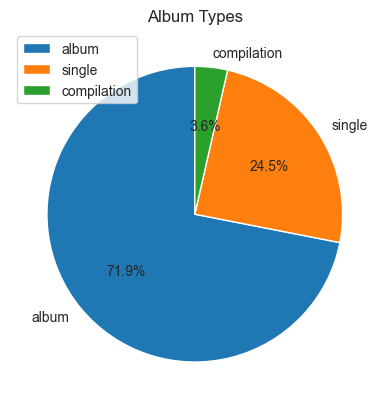

In [146]:
# Create a pie chart
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Album Types')
plt.legend()

plt.show()

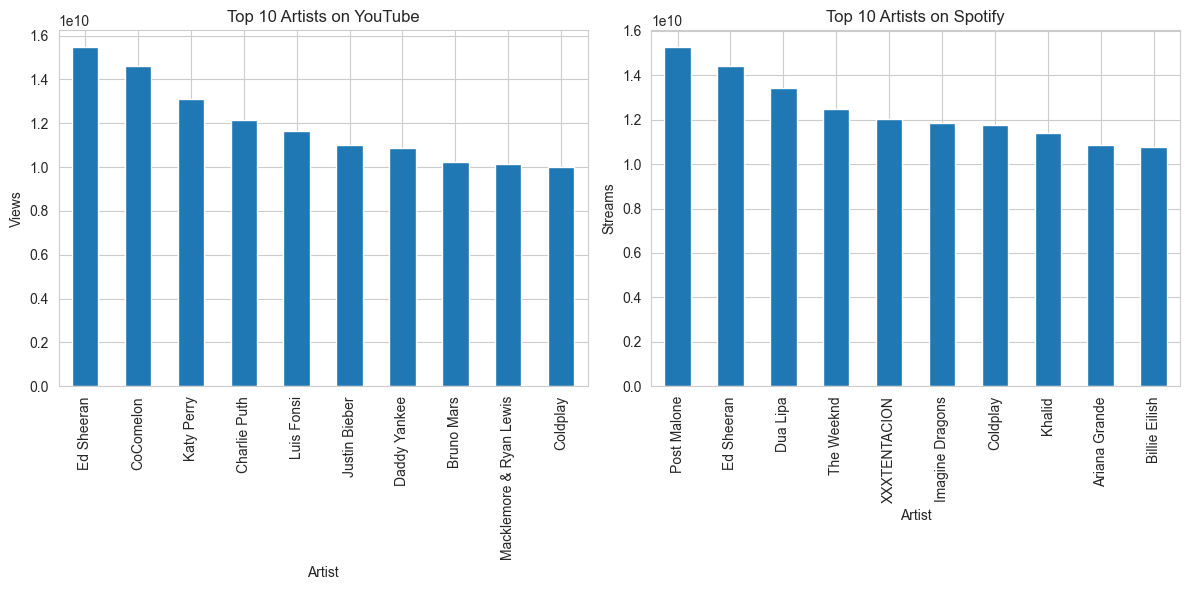

In [147]:
df_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]
df_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# top 10 yt
ax1.set_title('Top 10 Artists on YouTube')
df_views.plot(kind='bar', ax=ax1)

# top 10 spotify
ax2.set_title('Top 10 Artists on Spotify')
df_streams.plot(kind='bar', ax=ax2)


ax1.set_xlabel('Artist')
ax1.set_ylabel('Views')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Streams')
fig.tight_layout()
plt.show()

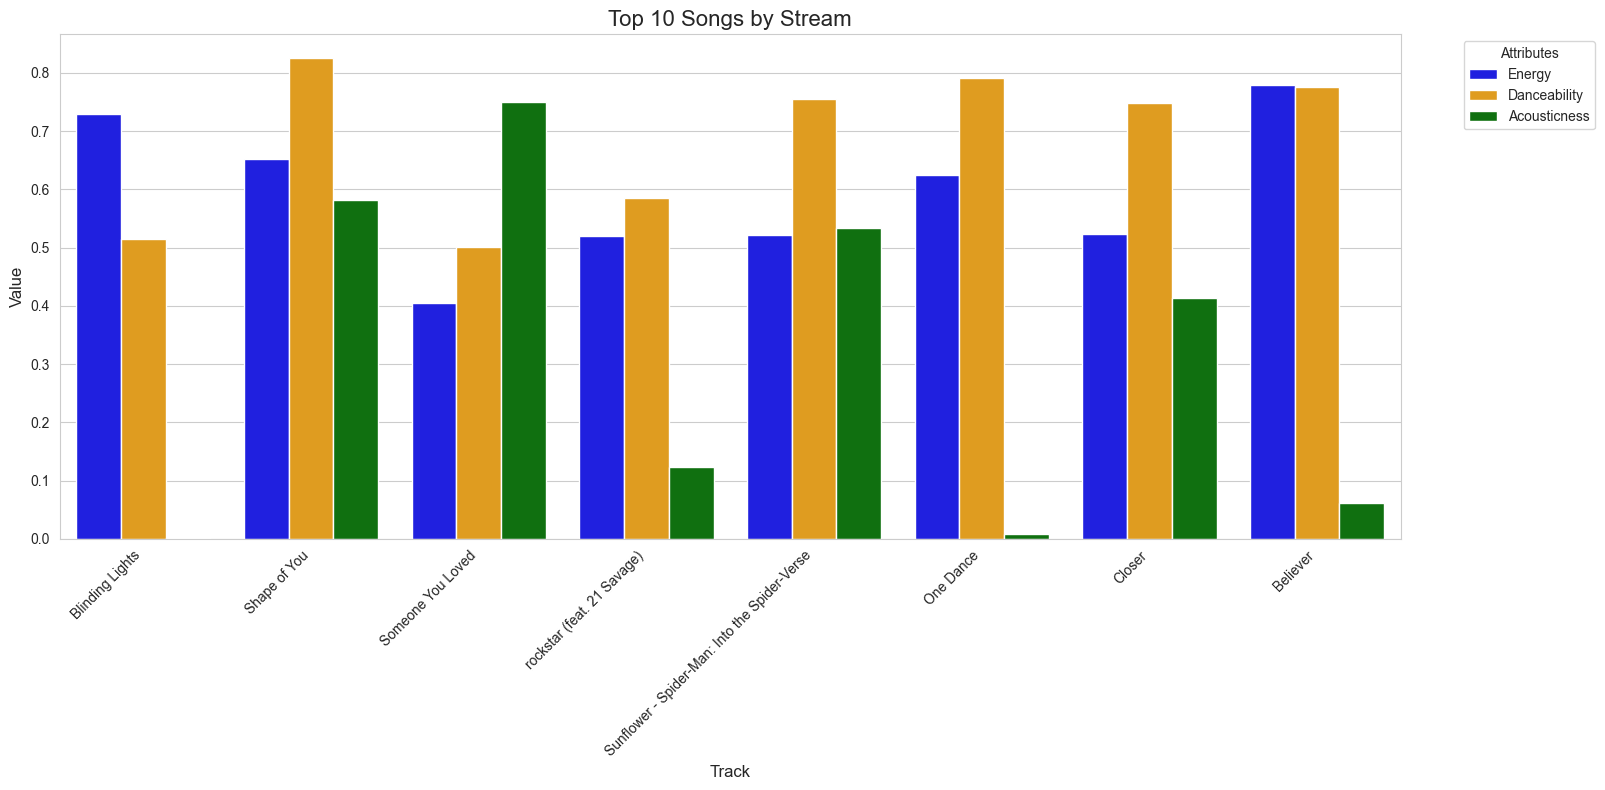

In [148]:
top_songs = df.sort_values('Stream', ascending=False).head(10)

top_songs_melt = top_songs.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness'],
                                 var_name='Attribute', value_name='Value')

sns.set_style('whitegrid')

plt.figure(figsize=(16, 8))
sns.barplot(x='Track', y='Value', hue='Attribute', data=top_songs_melt,
            palette={'Energy': 'blue', 'Danceability': 'orange', 'Acousticness': 'green'})

plt.title('Top 10 Songs by Stream', fontsize=16)
plt.xlabel('Track', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Attributes', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()  
plt.show()

In [153]:
numeric_cdf

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,0.818,0.705,6.0,-6.679,0.1770,0.00836,0.002330,0.6130,0.7720,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.08690,0.000687,0.0463,0.8520,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.04250,0.046900,0.1160,0.5510,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07
3,0.663,0.694,10.0,-8.627,0.1710,0.02530,0.000000,0.0698,0.5250,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08
4,0.760,0.891,11.0,-5.852,0.0372,0.02290,0.086900,0.2980,0.9660,120.264,245000.0,259021161.0,1844658.0,72008.0,3.238503e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18683,0.582,0.926,5.0,-6.344,0.0328,0.44800,0.000000,0.0839,0.6580,90.002,94667.0,71678.0,1113.0,0.0,9.227144e+06
18684,0.531,0.936,4.0,-1.786,0.1370,0.02800,0.000000,0.0923,0.6570,174.869,150857.0,164741.0,2019.0,0.0,1.089818e+07
18685,0.443,0.830,4.0,-4.679,0.0647,0.02430,0.000000,0.1540,0.4190,168.388,136842.0,35646.0,329.0,0.0,6.226110e+06
18686,0.417,0.767,9.0,-4.004,0.4190,0.35600,0.018400,0.1080,0.5390,155.378,108387.0,6533.0,88.0,0.0,6.873961e+06


<Axes: >

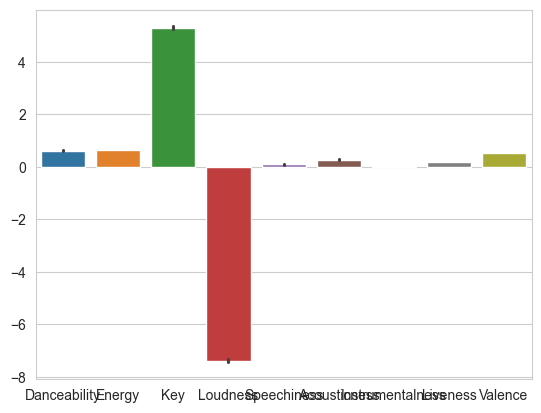

In [157]:
sns.barplot(numeric_cdf.drop(columns=["Views", "Stream", "Duration_ms", "Comments","Likes", "Tempo"]))